Task 1 Q1

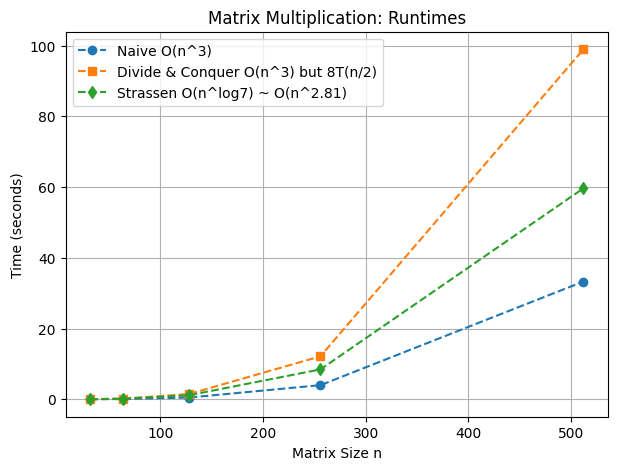

Naive exponent ~ 2.854
Divide & Conquer exponent ~ 2.896
Strassen exponent ~ 2.792


In [3]:
import numpy as np
import time
import matplotlib.pyplot as plt

def naive_matrix_multiply(A, B):
    n = A.shape[0]
    C = np.zeros((n, n))
    for i in range(n):
        for j in range(n):
            for k in range(n):
                C[i, j] += A[i, k] * B[k, j]
    return C

def divide_and_conquer_multiply(A, B):
    n = A.shape[0]
    if n == 1:
        return A * B
    mid = n // 2
    A11, A12 = A[:mid, :mid], A[:mid, mid:]
    A21, A22 = A[mid:, :mid], A[mid:, mid:]
    B11, B12 = B[:mid, :mid], B[:mid, mid:]
    B21, B22 = B[mid:, :mid], B[mid:, mid:]
    C11 = divide_and_conquer_multiply(A11, B11) + divide_and_conquer_multiply(A12, B21)
    C12 = divide_and_conquer_multiply(A11, B12) + divide_and_conquer_multiply(A12, B22)
    C21 = divide_and_conquer_multiply(A21, B11) + divide_and_conquer_multiply(A22, B21)
    C22 = divide_and_conquer_multiply(A21, B12) + divide_and_conquer_multiply(A22, B22)
    C = np.zeros((n, n))
    C[:mid, :mid] = C11
    C[:mid, mid:] = C12
    C[mid:, :mid] = C21
    C[mid:, mid:] = C22
    return C

def strassen_multiply(A, B):
    n = A.shape[0]
    if n == 1:
        return A * B
    mid = n // 2
    A11, A12 = A[:mid, :mid], A[:mid, mid:]
    A21, A22 = A[mid:, :mid], A[mid:, mid:]
    B11, B12 = B[:mid, :mid], B[:mid, mid:]
    B21, B22 = B[mid:, :mid], B[mid:, mid:]

    M1 = strassen_multiply(A11 + A22, B11 + B22)
    M2 = strassen_multiply(A21 + A22, B11)
    M3 = strassen_multiply(A11, B12 - B22)
    M4 = strassen_multiply(A22, B21 - B11)
    M5 = strassen_multiply(A11 + A12, B22)
    M6 = strassen_multiply(A21 - A11, B11 + B12)
    M7 = strassen_multiply(A12 - A22, B21 + B22)

    C11 = M1 + M4 - M5 + M7
    C12 = M3 + M5
    C21 = M2 + M4
    C22 = M1 - M2 + M3 + M6

    C = np.zeros((n, n))
    C[:mid, :mid] = C11
    C[:mid, mid:] = C12
    C[mid:, :mid] = C21
    C[mid:, mid:] = C22
    return C

def random_square_matrix(n):
    return np.random.rand(n, n)

def estimate_critical_exponent(sizes, times):
    # Perform a log-log linear fit: log(time) = p*log(n) + c
    log_n = np.log(sizes)
    log_t = np.log(times)
    p, c = np.polyfit(log_n, log_t, 1)
    return p

def run_experiments():
    sizes = [32, 64, 128, 256, 512]
    times_naive = []
    times_divide = []
    times_strassen = []
    
    for s in sizes:
        A = random_square_matrix(s)
        B = random_square_matrix(s)

        start = time.time()
        _ = naive_matrix_multiply(A, B)
        times_naive.append(time.time() - start)

        start = time.time()
        _ = divide_and_conquer_multiply(A, B)
        times_divide.append(time.time() - start)

        start = time.time()
        _ = strassen_multiply(A, B)
        times_strassen.append(time.time() - start)

    # Plot the raw times
    plt.figure(figsize=(7,5))
    plt.plot(sizes, times_naive, 'o--', label='Naive O(n^3)')
    plt.plot(sizes, times_divide, 's--', label='Divide & Conquer O(n^3) but 8T(n/2)')
    plt.plot(sizes, times_strassen, 'd--', label='Strassen O(n^log7) ~ O(n^2.81)')
    plt.xlabel('Matrix Size n')
    plt.ylabel('Time (seconds)')
    plt.title('Matrix Multiplication: Runtimes')
    plt.legend()
    plt.grid(True)
    plt.show()

    # Estimate exponents
    p_naive = estimate_critical_exponent(sizes, times_naive)
    p_divide = estimate_critical_exponent(sizes, times_divide)
    p_strassen = estimate_critical_exponent(sizes, times_strassen)

    print(f"Naive exponent ~ {p_naive:.3f}")
    print(f"Divide & Conquer exponent ~ {p_divide:.3f}")
    print(f"Strassen exponent ~ {p_strassen:.3f}")

if __name__ == "__main__":
    import time
    run_experiments()


Task 1 Q2

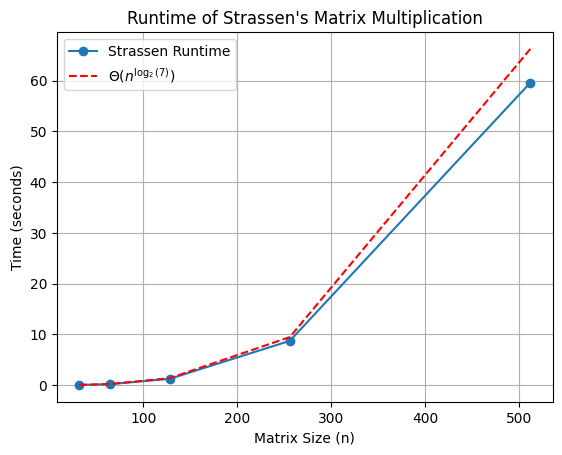

In [4]:

import numpy as np
import time
import matplotlib.pyplot as plt

def strassen_multiply(A, B):
    n = A.shape[0]
    if n == 1:
        return A * B
    m = n // 2
    A11, A12 = A[:m, :m], A[:m, m:]
    A21, A22 = A[m:, :m], A[m:, m:]
    B11, B12 = B[:m, :m], B[:m, m:]
    B21, B22 = B[m:, :m], B[m:, m:]
    M1 = strassen_multiply(A11 + A22, B11 + B22)
    M2 = strassen_multiply(A21 + A22, B11)
    M3 = strassen_multiply(A11, B12 - B22)
    M4 = strassen_multiply(A22, B21 - B11)
    M5 = strassen_multiply(A11 + A12, B22)
    M6 = strassen_multiply(A21 - A11, B11 + B12)
    M7 = strassen_multiply(A12 - A22, B21 + B22)
    C11 = M1 + M4 - M5 + M7
    C12 = M3 + M5
    C21 = M2 + M4
    C22 = M1 - M2 + M3 + M6
    C = np.zeros((n, n), dtype=A.dtype)
    C[:m, :m]   = C11
    C[:m, m:]   = C12
    C[m:, :m]   = C21
    C[m:, m:]   = C22
    return C

def random_square_matrix(n):
    return np.random.rand(n, n)

def main():
    sizes = [32, 64, 128, 256, 512]
    times = []
    for s in sizes:
        A = random_square_matrix(s)
        B = random_square_matrix(s)
        start = time.time()
        _ = strassen_multiply(A, B)
        times.append(time.time() - start)

    p = np.log2(7)
    c = times[0] / (sizes[0]**p)
    ref_times = [c * (sz**p) for sz in sizes]

    plt.plot(sizes, times, 'o-', label="Strassen Runtime")
    plt.plot(sizes, ref_times, 'r--', label=r'$\Theta(n^{\log_2(7)})$')
    plt.xlabel("Matrix Size (n)")
    plt.ylabel("Time (seconds)")
    plt.title("Runtime of Strassen's Matrix Multiplication")
    plt.legend()
    plt.grid(True)
    plt.show()

if __name__ == "__main__":
    main()
